## Lời mở đầu

Ngày nay, phân tích dữ liệu marketing là một trong những ứng dụng điển hình nhất của khoa học dữ liệu và machine learning trong kinh tế và kinh doanh. 

Nhìn chung, tập dữ liệu chứa dữ liệu marketing có thể được sử dụng cho 2 mục tiêu kinh doanh khác nhau:
1. Dự đoán kết quả của chiến dịch marketing cho từng khách hàng và làm rõ các yếu tố ảnh hưởng đến kết quả chiến dịch. Điều này giúp tìm ra cách thực hiện các chiến dịch marketing hiệu quả hơn.
2. Tìm hiểu phân khúc khách hàng, sử dụng dữ liệu khách hàng đăng ký tiền gửi có kỳ hạn. Điều này giúp xác định hồ sơ của khách hàng, những người có nhiều khả năng mua được sản phẩm hơn và phát triển các chiến dịch marketing nhắm tới các đối tượng khách hàng tiềm năng.

Bộ dữ liệu này chứa dữ liệu chiến dịch marketing của ngân hàng và việc thực hiện phân tích có thể giúp ngân hàng tối ưu hóa các chiến dịch marketing nhằm thu hút nhiều khách hàng đăng ký tiền gửi có kỳ hạn hơn.

## Mục tiêu

Để tối ưu hóa các chiến dịch marketing với sự trợ giúp của tập dữ liệu, chúng ta sẽ phải thực hiện các bước sau:
1. Nhập dữ liệu từ tập dữ liệu và thực hiện phân tích cấp cao ban đầu: xem xét số lượng hàng, xem các giá trị còn thiếu, xem các cột tập dữ liệu và giá trị của chúng tương ứng với kết quả chiến dịch.
2. Làm sạch dữ liệu: loại bỏ các cột không liên quan, xử lý các giá trị bị thiếu và không chính xác, biến các cột phân loại thành các biến giả.
3. Sử dụng các kỹ thuật machine learning để dự đoán kết quả chiến dịch tiếp thị và tìm ra các yếu tố ảnh hưởng đến sự thành công của chiến dịch.

## I. Import data and libraries

Đầu tiên, chúng ta cần nhập dữ liệu trước khi thực hiện các bước phân tích ở phần sau của report

In [ ]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, roc_auc_score #metrics
plt.style.use('seaborn-white')
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

# Any results you write to the current directory are saved as output.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [90]:
from urllib.request import  urlretrieve
url = 'https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/bank/bankX.csv'
urlretrieve(url, 'bank.csv')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df0 = pd.read_csv('bank.csv', index_col= 0)
df0.head()
df0 = df0.rename(columns={'y':'deposit'})
df0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Mô tả bộ data: 
#### Bank client data
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes')<br>
8 - **balance:** Balance of the individual.

#### Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone','unknown') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the month <br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target.<br>

#### Other attribute data
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')<br>

Output variable (desired target):<br>
21 - **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')

## II. Data Exploration

Sau khi import dữ liệu, chúng ta sẽ tiến hành quan sát tổng số hàng, cột của dataset và kiểm tra có missing values trong dataset hay không

### Check missing value

In [3]:
df = df0.copy()
df.shape

(45211, 17)

In [4]:
# số lượng hàng trong dataset
print("Bank marketing dataset bao gồm {rows} hàng.".format(rows = len(df)))

Bank marketing dataset bao gồm 45211 hàng.


In [5]:
# tìm missing values cho từng cột
missing_values = df.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# phần trăm missing values trong từng cột
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

Ta có thể rút ra kết luận không tồn tại missing values trong dataset

### Data Balance

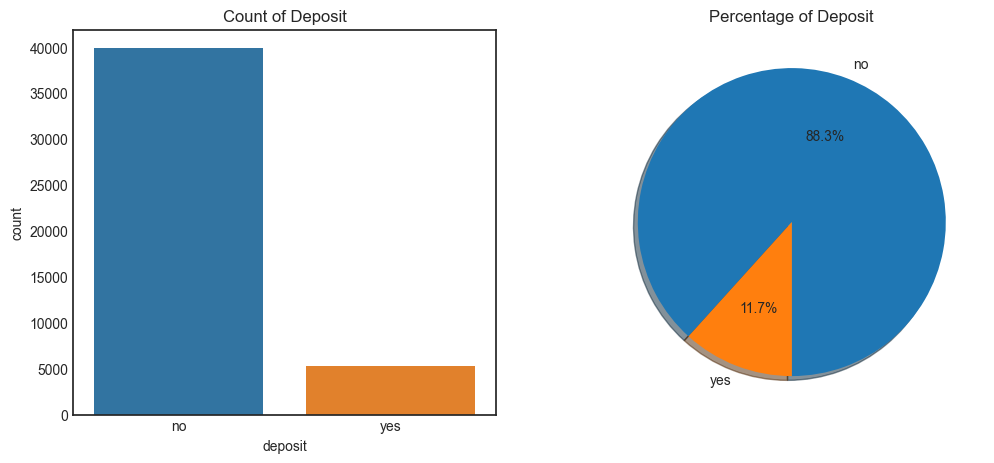

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df)
plt.title("Count of Deposit")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Deposit',size = 12)
plt.show()

Comment:
- Dữ liệu bị lệch, phần lớn bộ dữ liệu thiên về no deposit

### Data Visualization for categorical columns

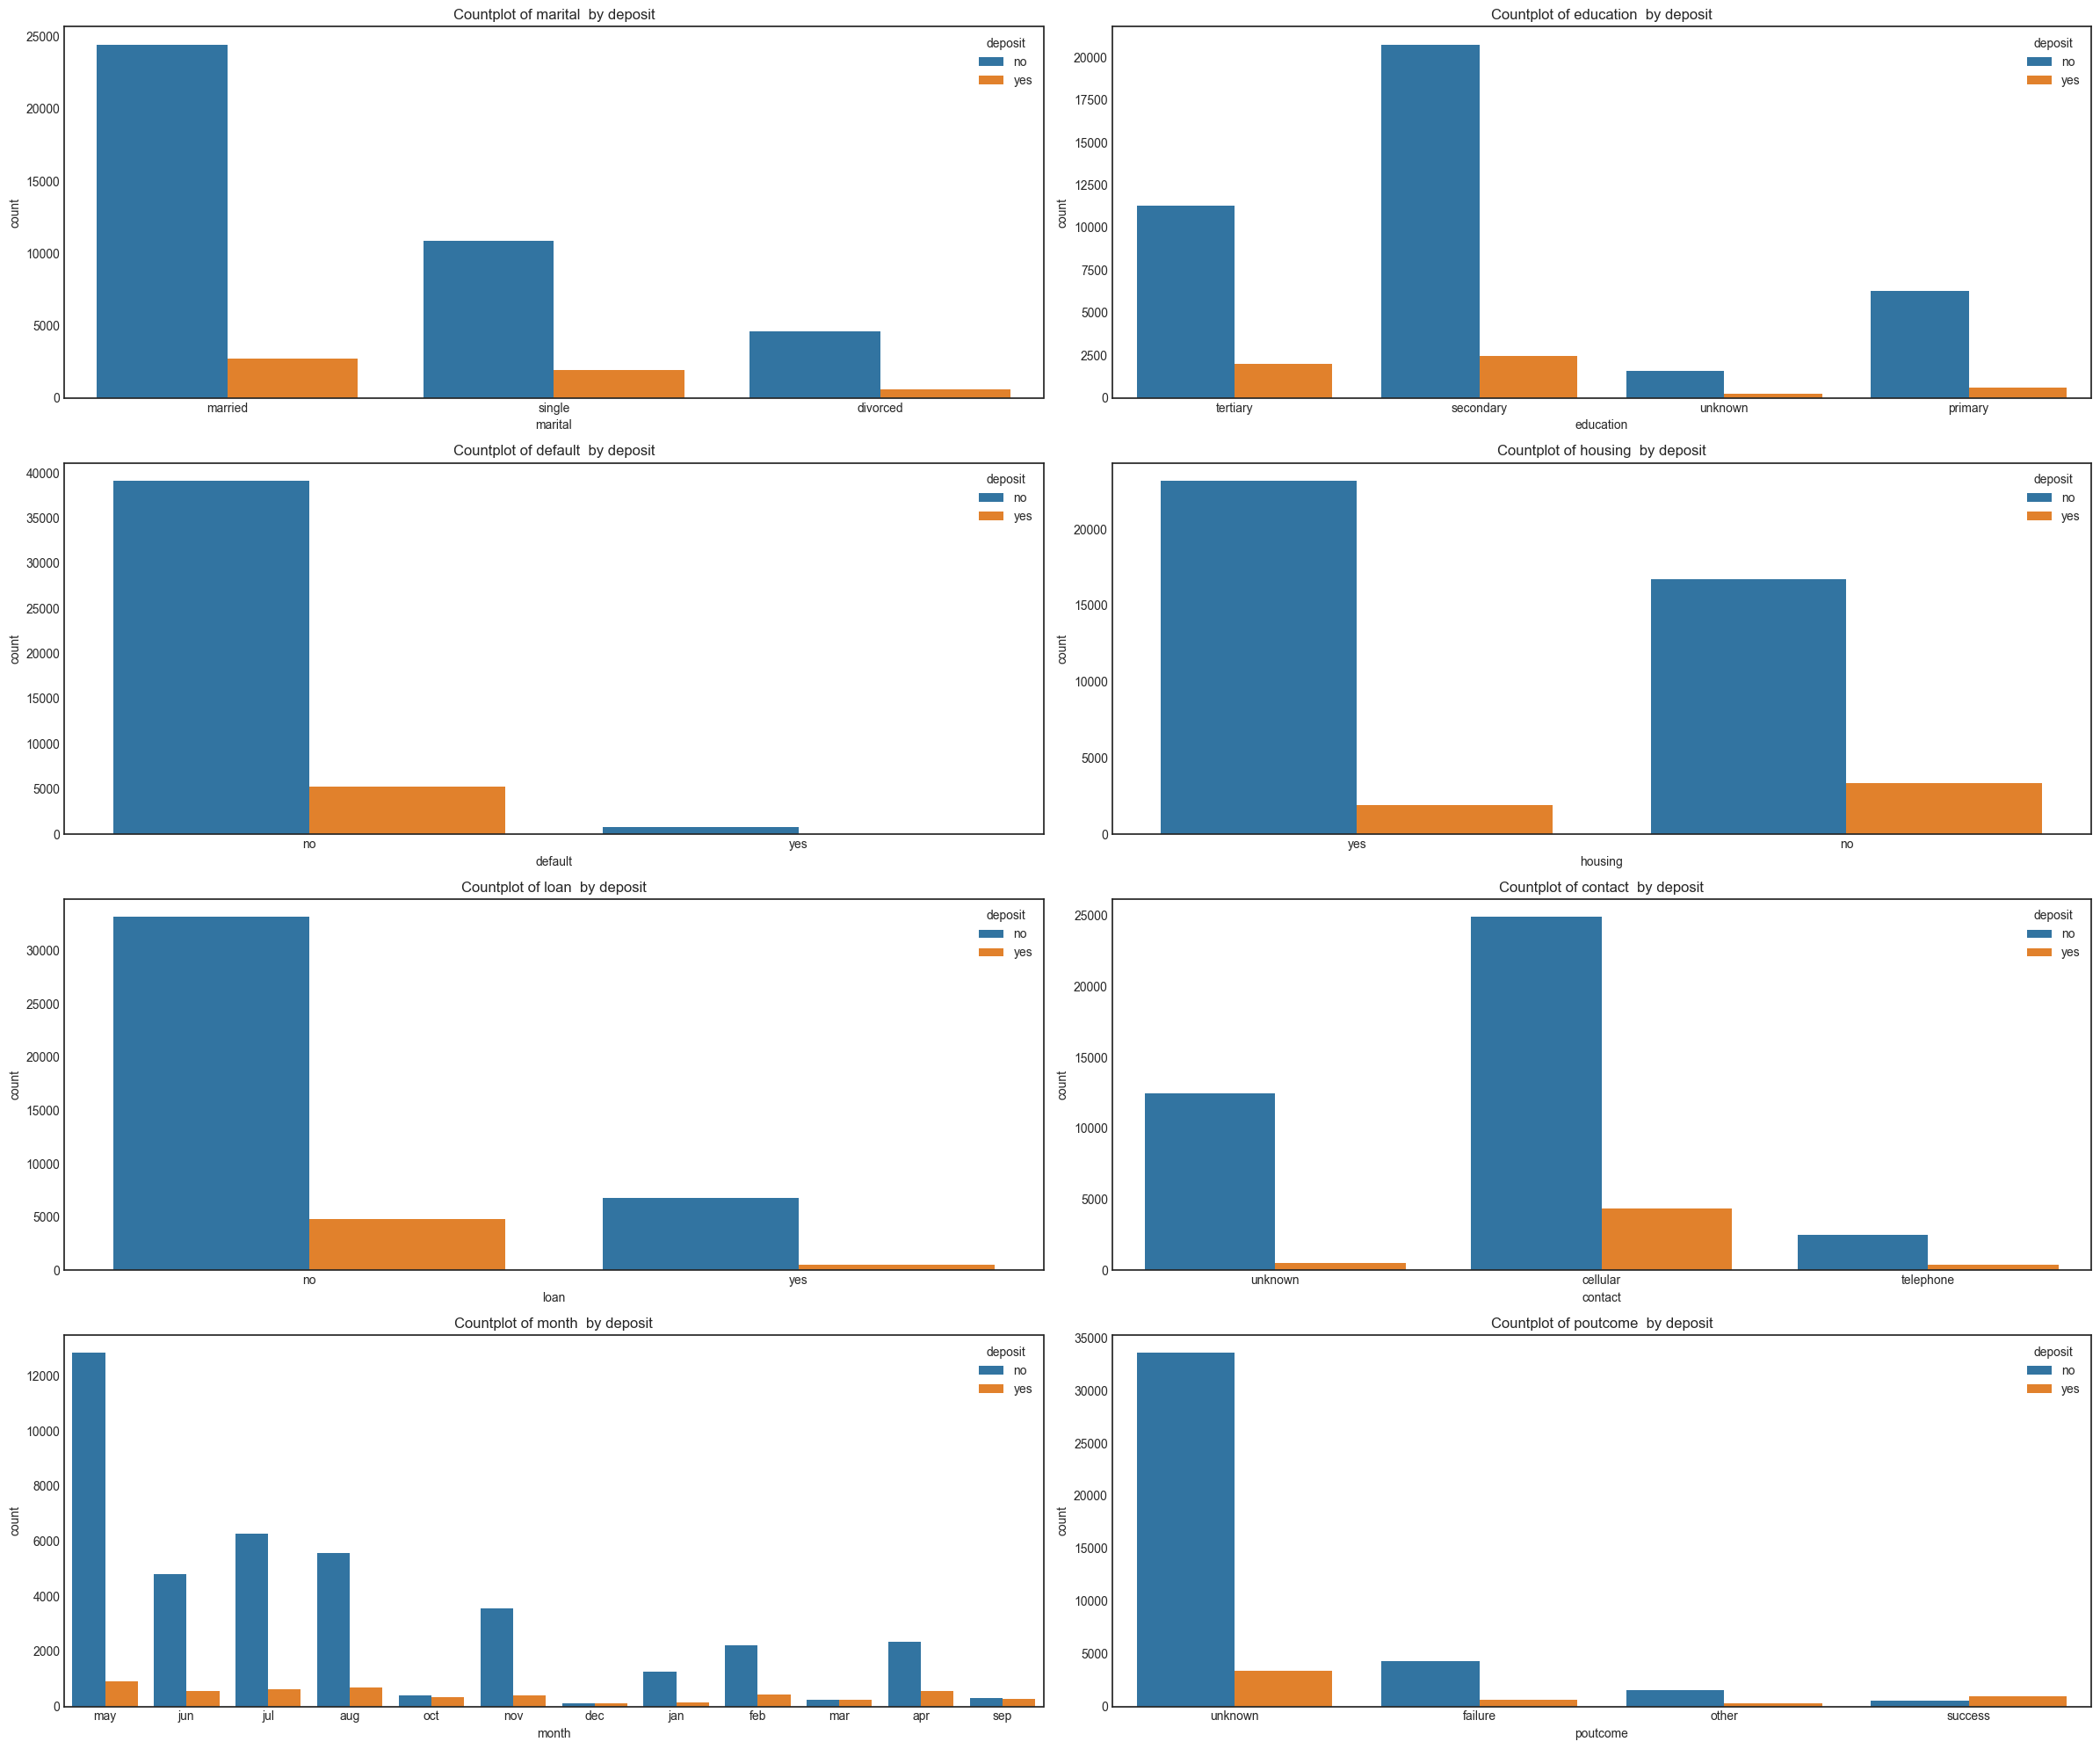

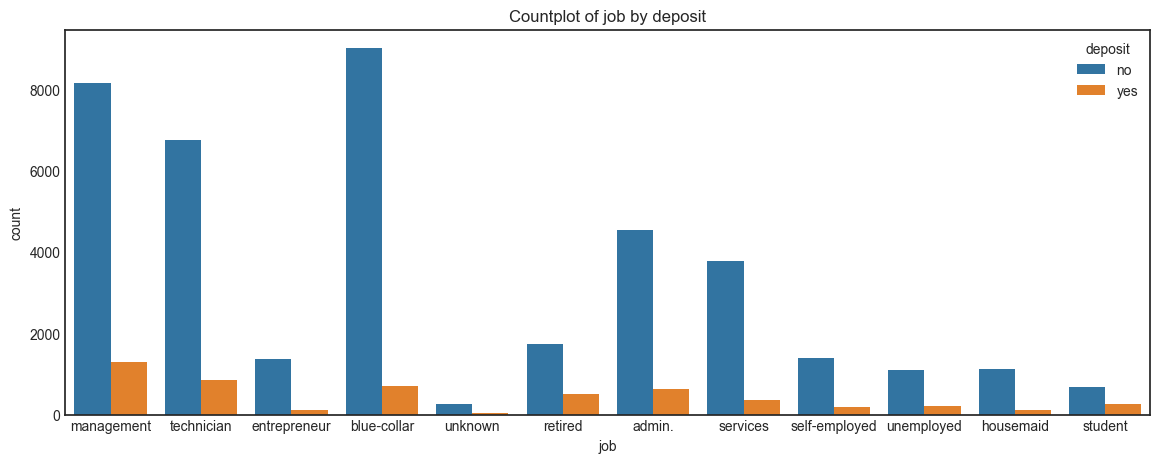

In [10]:
df_cat = df.select_dtypes(include='object').columns.drop(['deposit','job'])

plt.figure(figsize=(24, 20))
for i, cat_fea in enumerate(df_cat):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=cat_fea,hue='deposit',data=df)
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()

plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='deposit',data=df)
plt.title("Countplot of job by deposit")
plt.show()

Comment:
- Khách hàng độc thân sẽ có khả năng cho vay cao hơn so với khách hàng đã lập gia đình
- Những khách hàng không có khoản nợ mua nhà sẽ có khả năng đăng ký tiền gửi cao hơn
- Contact = unknown: Các khách hàng không rõ hình thức liên lạc có tỷ lệ cho vay rất thấp
- Tháng 5 có số cuộc gọi cao nhất, trong khi tháng thấp nhất là tháng 12. 
- Học sinh/sinh viên và hưu trí sẽ có khả năng cho vay theo kì hạn cao hơn

### Numerical Columns Exploration

Bước tiếp theo chúng ta sẽ tiến hành phân tích numerical values. 

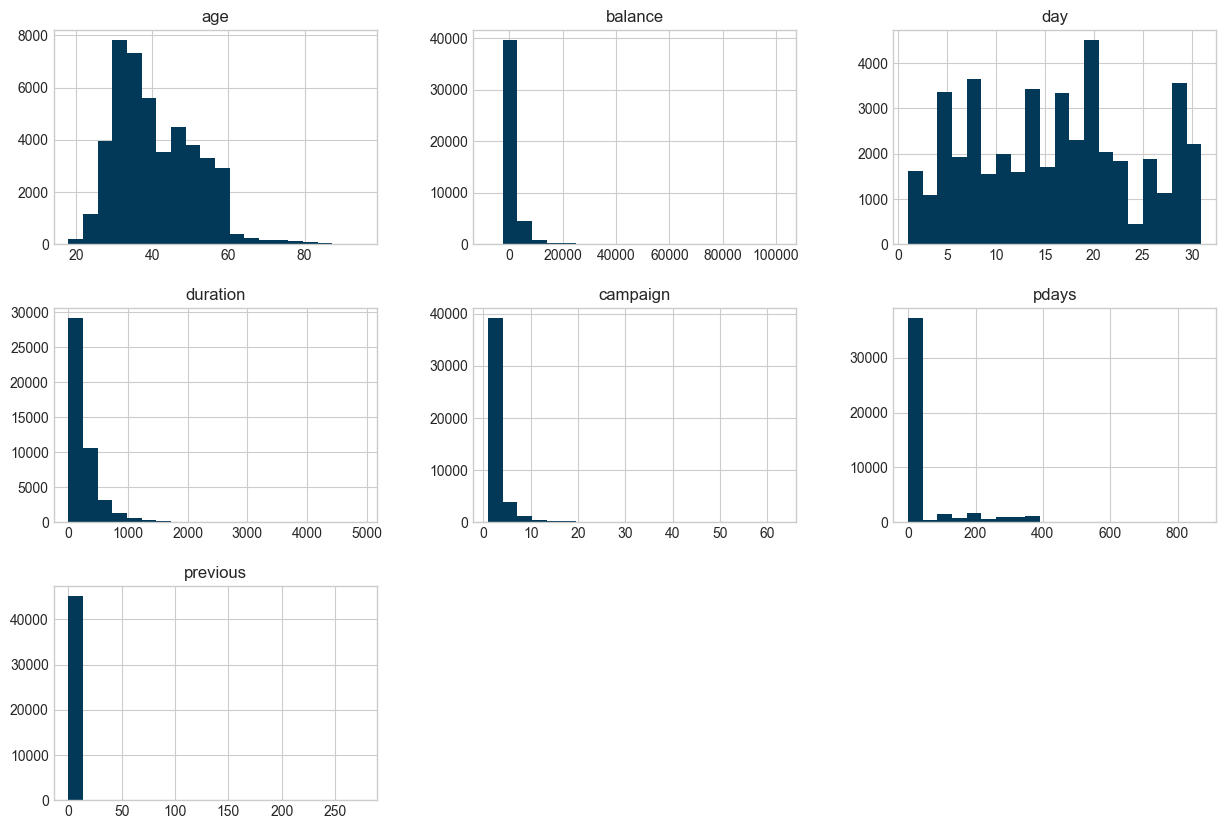

In [11]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(15,10), color='#023858')
plt.show()

Nhìn vào các biểu đồ: Các cột đều có outliers (đặc biệt là cột 'pdays', 'campaign', và cột 'previous')vì vậy chúng ta cần xem xét lại cách xử lí ở phần data cleaning

In [12]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


Phần trăm giá trị của cột 'pdays' trên 400

In [13]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.5175731569750724

'pdays' chứa số ngày đã trôi qua sau khi khách hàng được liên hệ lần cuối từ một chiến dịch trước đó. Nhìn kỹ hơn vào dữ liệu 'pdays', chúng ta có thể thấy rằng:

+ Chỉ 1,2% giá trị trên 400. Chúng có thể là giá trị ngoại lệ, vì vậy chúng ta nên xem xét việc thay thế giá trị trung bình thay vì những giá trị này.
+ pdays = -1 là những khách hàng chưa từng được liên hệ bao giờ
Vì chúng ta không chắc chắn chính xác -1 có nghĩa là gì, chúng ta có thể bỏ cột này vì -1 chiếm hơn 50% giá trị của cột.

Phần trăm giá trị 'chiến dịch' trên 20:

In [14]:
len (df[df['campaign'] > 20] ) / len(df) * 100

0.5396916679569131

'campaign' giữ số lượng địa chỉ liên hệ được thực hiện trong chiến dịch này và cho khách hàng này (số, bao gồm cả liên hệ cuối cùng)
Các con số cho 'campaign' trên 34 rõ ràng là nhiễu, vì vậy chúng ta có thể áp dụng các giá trị chiến dịch trung bình trong khi làm sạch dữ liệu.

Phần trăm giá trị của 'previous' trên 20

In [15]:
len (df[df['previous'] > 20] ) / len(df) * 100

0.12165181040012386

'previous' giữ số lượng địa chỉ liên hệ được thực hiện trước chiến dịch này và đối với khách hàng này (số)<br> 
Các dữ liệu cho cột 'previous' trên 20 không rõ ràng, vì vậy chúng ta có thể áp dụng chúng với các giá trị chiến dịch trung bình trong khi làm sạch dữ liệu.

### Tìm mối liên hệ

Phân tích để tìm ra mối liên hệ giữa các cột rất quan trọng, giúp chúng ta có thể thực hiện các bước tiếp theo trong quá trình phân tích. Trong trường hợp này, chúng ta sẽ tiến hành phân tích cột 'deposit' và so sánh giá trị của nó với các cột khác trong dataset.
Trước hết, chúng ta sẽ quan sát mối liên hệ giữa cột 'Age' và 'Deposit'. 

<b>Age - Deposit</b>

<AxesSubplot:title={'center':'Age and deposit statistics'}>

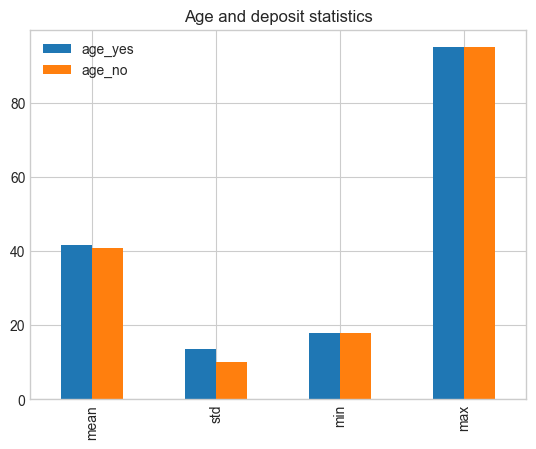

In [17]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

Nhận xét: Ảnh hưởng của nhân tố tuổi tác lên deposit không rõ ràng, cần xem xét lại nhân tố này trong dataset

<b>Balance and deposit</b>

<AxesSubplot:title={'center':'Balance and deposit statistics'}>

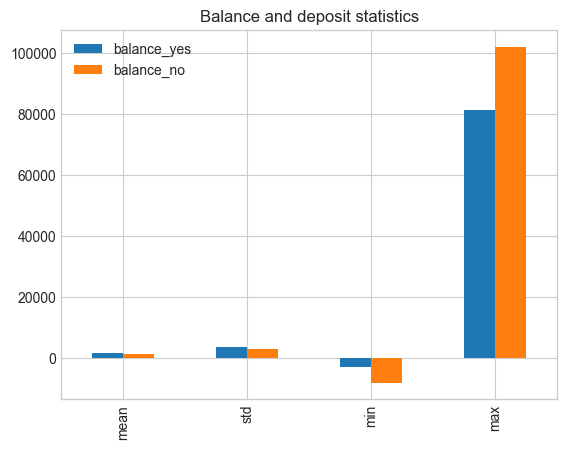

In [19]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

Nhận xét: Khách hàng có số dư tài khoản hằng năm thấp sẽ lựa chọn term deposit, vì vậy, chúng ta cần xem xét lại do dữ liệu bị lệch khá nhiều

<b>Number of contacts performed during this campaign ('campaign') and deposit</b>

<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

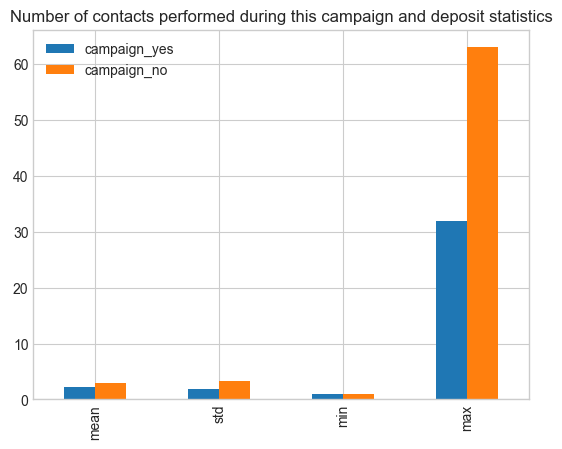

In [21]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

Nhận xét: Khách hàng được liên hệ với tần suất ít hơn trong chiến dịch này có xu hướng chọn term deposit

<b>Number of contacts performed during previous campaign ('previous') and deposit</b>

<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

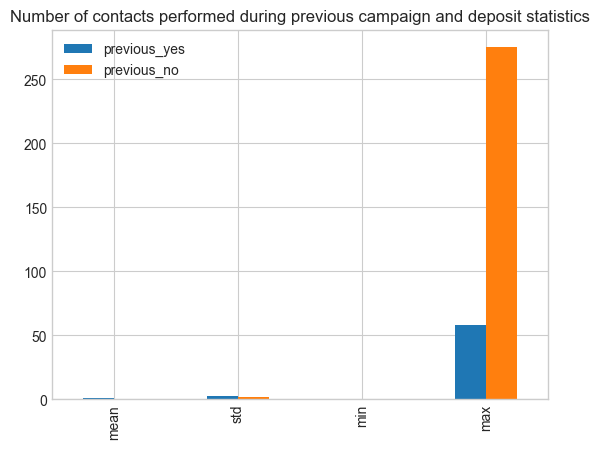

In [23]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df1 = df[['age', 'balance', 'day', 'duration', 'campaign','previous','deposit']]
corr = df1.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.032855
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,1.000000


<b>Từ correlation matrix:</b> <i>duration</i> có tương quan nhiều nhất với <i>deposit</i> 

Nhận xét chung: 
1. Cá nhân đăng kí term deposit thường lớn tuổi hơn và có nhiều tài sản hơn.
2. Cá nhân đăng kí term deposit thường nhận được ít liên hệ trong quá trình diễn ra campaign. 

# III. Machine Learning Model with Decision Tree Algorithms

### Lựa chọn model

In [55]:
# Do data không có missing value nên các biến cateogrical chuyển sang dạng category luôn
# Các model áp dụng đều liên quan đến DecisionTree nên không sử dụng Feature Scaling ở đây
df = df0.copy()
selected_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','deposit']
for col in selected_col:
    df[col] = df[col].astype('category').cat.codes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [56]:
# Loại bỏ cột pdays vì chứa đồng thời pdays = -1 (kiểu category) và pdays > 0 (numeric) 
df = df.drop(columns='pdays')

In [57]:
X = df.drop(columns = 'deposit')
y = df[['deposit']]
TEST_SIZE = 0.3
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

Các mô hình được sử dụng là Decision Tree, Random Forest, Gradient Boosting, XGBoost/<br>
Ngoài ra, do bộ data có sự chênh lệch biến phụ thuộc deposit (tỷ lệ khoảng 1/8 giữa 2 class).<br>
--> Sử dụng thêm 2 Model là BalancedRandomForest và SMOTE

In [58]:
# Chạy kiểm định chéo với 3 mẫu để tính điểm roc_auc trung bình
# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train,scoring='roc_auc', cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier(n_estimators= 30)
grad_scores = cross_val_score(grad_clf, X_train, y_train,scoring='roc_auc', cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators= 30)
rand_scores = cross_val_score(rand_clf, X_train, y_train,scoring='roc_auc', cv=3)
rand_mean = rand_scores.mean()

# XGBoost với scale_pos_weight = total neagetive/total positive
xgb = xgboost.XGBClassifier(n_estimators = 30, supsample = 0.5, eta = 0.1, colsample_bytree = 0.8, scale_pos_weight = 8)
xgb_scores = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv= 3)
xgb_mean = xgb_scores.mean()

# ImbalancedRandomForest
ibrand_clf = BalancedRandomForestClassifier(n_estimators= 30)
ibrand_scores = cross_val_score(ibrand_clf, X_train, y_train,scoring='roc_auc', cv=3)  
ibrand_mean = ibrand_scores.mean()

#SMOTE
oversample = SMOTE()
smote = RandomForestClassifier(n_estimators= 30)
over_X, over_y = oversample.fit_resample(X_train, y_train)
#over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size = TEST_SIZE, random_state=RAND_STATE)
SMOTE_scores = cross_val_score(smote, over_X, over_y, scoring='roc_auc', cv= 3)
Smote_mean = SMOTE_scores.mean()

e:\Ứng dụng\Python\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Ứng dụng\Python\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Ứng dụng\Python\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Ứng dụng\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[08:01:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "supsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:01:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "supsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:01:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "supsample" } might not be used.

  This could b

e:\Ứng dụng\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\Ứng dụng\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\Ứng dụng\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\Ứng dụng\Python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array

In [59]:
result_df = pd.DataFrame({'Classifiers': ['Dec Tree', 'Grad B CLF', 'Rand FC', 'XGBoost', 'Balanced_Rand','Smote'], 
    'ROC-AUC Scores': [tree_mean, grad_mean, rand_mean, xgb_mean, ibrand_mean, Smote_mean]})
result_df

,Classifiers,ROC-AUC Scores
0,Dec Tree,0.697667
1,Grad B CLF,0.902938
2,Rand FC,0.909851
3,XGBoost,0.919982
4,Balanced_Rand,0.914074
5,Smote,0.979618


In [60]:
# Mô hình RandomForest + Smote cho ra kết quả tốt nhất. Chạy lại mô hình này
oversample = SMOTE()
over_X_train, over_y_train = oversample.fit_resample(X_train, y_train)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators= 30)
#Train SMOTE SRF
tree = SMOTE_SRF.fit(over_X_train, over_y_train)

C:\Users\dangv\AppData\Local\Temp\ipykernel_13248\3214538618.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = SMOTE_SRF.fit(over_X_train, over_y_train)


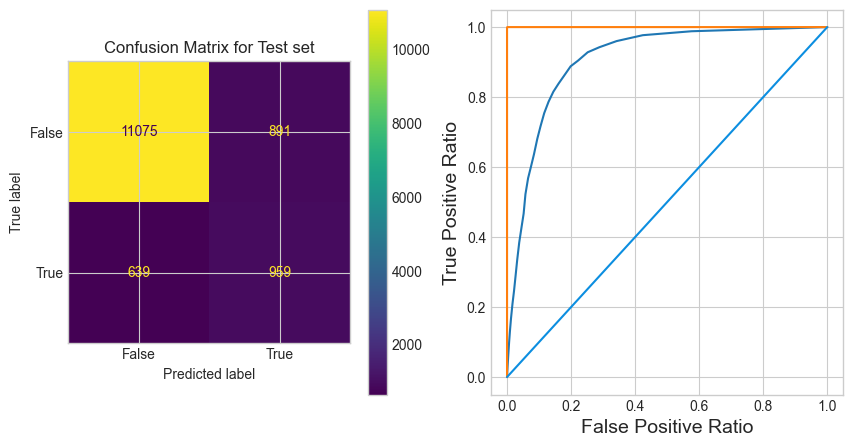

In [61]:
#Create confusion matrix 
fig, axes = plt.subplots(1,2, figsize = (10,5))
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test, SMOTE_SRF.predict(X_test)), 
    display_labels = [False, True]).plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Test set')
# Đường roc_auc
probs_ = SMOTE_SRF.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _= roc_curve(y_test, probs_)
fpr_train, tpr_train, _ = roc_curve(over_y_train,SMOTE_SRF.predict_proba(over_X_train)[:, 1] )
axes[1].plot(fpr_test, tpr_test)
axes[1].plot(fpr_train, tpr_train)
axes[1].plot([0, 1], [0, 1], '#0C8EE0')
axes[1].set_xlabel('False Positive Ratio', size=14)
axes[1].set_ylabel('True Positive Ratio', size=14)
plt.show()
# Đường roc_auc của train set bị vuông hẳn -->  bị overfit


In [62]:
# Check kết quả giữa train set và test set
result_1 =pd.DataFrame({'Names': ['roc_auc','precision','recall'],
                        'Test_Scores': [roc_auc_score(y_test, SMOTE_SRF.predict(X_test)),precision_score(y_test, SMOTE_SRF.predict(X_test)),recall_score(y_test, SMOTE_SRF.predict(X_test))],
                        'Train_Scores': [roc_auc_score(over_y_train, SMOTE_SRF.predict(over_X_train)),precision_score(over_y_train, SMOTE_SRF.predict(over_X_train)),recall_score(over_y_train, SMOTE_SRF.predict(over_X_train))]})
result_1
# Chênh lệch khá lớn giữa Train Set Scores và Test Set Scores --> overfiting

,Names,Test_Scores,Train_Scores
0,roc_auc,0.762832,0.999678
1,precision,0.518378,0.999785
2,recall,0.600125,0.999571


### Tối ưu model và xem xét các biến ảnh hưởng

In [83]:
pipe = Pipeline([('over', SMOTE()), ('under', RandomUnderSampler()), ('rf',RandomForestClassifier())])
param_grid = { 'over__sampling_strategy':[0.2, 0.3],
                'over__k_neighbors':[6,7],
                'under__sampling_strategy':[0.2, 0.3],
                'rf__n_estimators':[60, 80],
                'rf__min_samples_split':[10,20],
                'rf__min_samples_leaf':[5,10],
                'rf__max_depth':[10,11],
                'rf__class_weight':[{1:6,0:1},{1:7,0:1}]}
grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'roc_auc', cv = 2).fit(X_train, y_train)
print(grid.best_params_)

e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'over__k_neighbors': 6, 'over__sampling_strategy': 0.2, 'rf__class_weight': {1: 6, 0: 1}, 'rf__max_depth': 11, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 20, 'rf__n_estimators': 60, 'under__sampling_strategy': 0.2}


In [117]:
# Mô hình cuối bao gồm oversamping, undersampling và RandomForestClassifier
over = SMOTE(sampling_strategy=0.2, k_neighbors=6)
over_X_train, over_y_train = over.fit_resample(X_train, y_train)
under = RandomUnderSampler(sampling_strategy=0.2)
under_X_train, under_y_train = under.fit_resample(over_X_train, over_y_train)
SMOTE_SRF_final = RandomForestClassifier(n_estimators= 60,
                                     min_samples_split= 20,
                                     min_samples_leaf = 10,
                                     class_weight={1:6, 0:1},
                                     max_depth = 11)

tree = SMOTE_SRF_final.fit(under_X_train, under_y_train)
result_2 =pd.DataFrame({'Names': ['roc_auc','precision','recall'],
                        'Test_Scores_2': [roc_auc_score(y_test, SMOTE_SRF_final.predict(X_test)),precision_score(y_test, SMOTE_SRF_final.predict(X_test)),recall_score(y_test, SMOTE_SRF_final.predict(X_test))],
                        'Train_Scores_2': [roc_auc_score(under_y_train, SMOTE_SRF_final.predict(under_X_train)),precision_score(under_y_train, SMOTE_SRF_final.predict(under_X_train)),recall_score(under_y_train, SMOTE_SRF_final.predict(under_X_train))]})
result = pd.concat([result_1,result_2], axis = 1)
result
# roc_auc score chênh lệch khoảng 4%, overfiting được xử lý.

C:\Users\dangv\AppData\Local\Temp\ipykernel_13248\631786133.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = SMOTE_SRF_final.fit(under_X_train, under_y_train)


,Names,Test_Scores,Train_Scores,Names,Test_Scores_2,Train_Scores_2
0,roc_auc,0.762832,0.999678,roc_auc,0.837624,0.884529
1,precision,0.518378,0.999785,precision,0.403846,0.535799
2,recall,0.600125,0.999571,recall,0.841051,0.930245


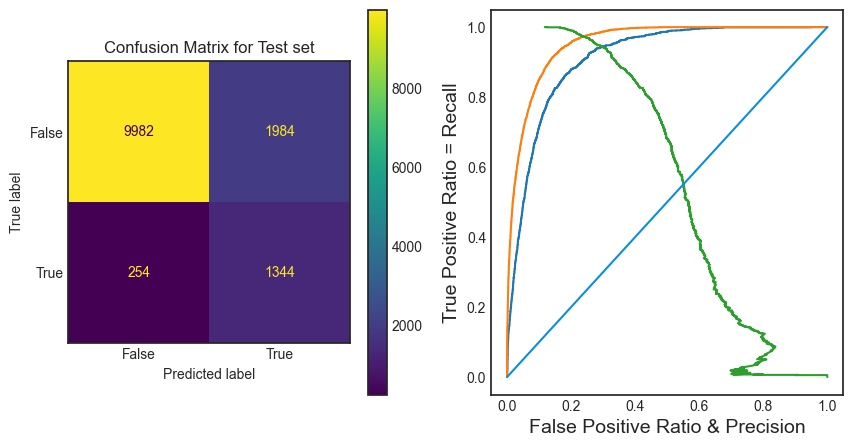

In [118]:
#Create confusion matrix 
fig, axes = plt.subplots(1,2, figsize = (10,5))
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test, SMOTE_SRF_final.predict(X_test)), 
    display_labels = [False, True]).plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Test set')
# Đường roc_auc
probs_ = SMOTE_SRF_final.predict_proba(X_test)[:, 1]
precision_, recall_,_ = precision_recall_curve(y_test, probs_)
fpr_test, tpr_test, _= roc_curve(y_test, probs_)
fpr_train, tpr_train, _ = roc_curve(under_y_train,SMOTE_SRF_final.predict_proba(under_X_train)[:, 1] )
axes[1].plot(fpr_test, tpr_test)
axes[1].plot(fpr_train, tpr_train)
axes[1].plot(precision_, recall_)
axes[1].plot([0, 1], [0, 1], '#0C8EE0')
axes[1].set_xlabel('False Positive Ratio & Precision', size=14) # Giá trị của False positive Ratio và và đường precision được biểu diễn trên cùng trục x, 2 cái này khác nhau.
axes[1].set_ylabel('True Positive Ratio = Recall', size=14) 
plt.show()
# Đường roc_auc của test set và train set khá gần nhau --> không bị overfit


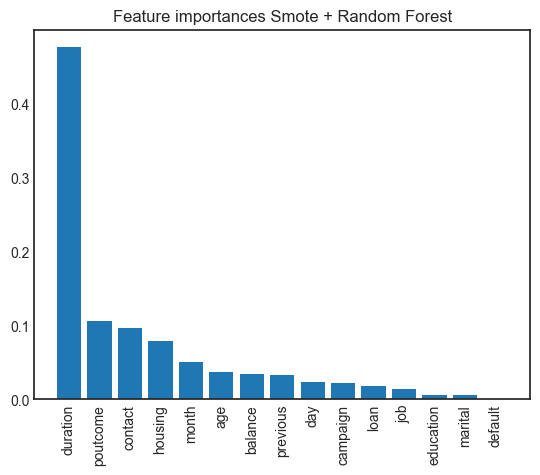

In [119]:
# Vẽ biểu đồ importance của các features 
importances = tree.feature_importances_
headers = ["name", "score"]
values = sorted(zip(under_X_train.columns, tree.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(feature_importances))
plt.bar(x_pos, feature_importances['score'])
plt.xticks(x_pos, feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances Smote + Random Forest')
plt.show()

### Test lại model trên các biến có ảnh hưởng

In [93]:
# 5 biến có ảnh hưởng nhiều nhất là duration, poutcome, contact, housing và month
#Chọn ra 5 biến này làm model mới để xem thứ tự ảnh hưởng các biến có thay đổi không
X_train_core = X_train[['duration','poutcome','contact','housing','month']]
X_test_core = X_train[['duration','poutcome','contact','housing','month']]
y_train_core = y_train
y_test_core = y_test

In [91]:
pipe = Pipeline([('over', SMOTE()), ('under', RandomUnderSampler()), ('rf',RandomForestClassifier())])
param_grid = { 'over__sampling_strategy':[0.2, 0.3],
                'over__k_neighbors':[6,7],
                'under__sampling_strategy':[0.2, 0.3],
                'rf__n_estimators':[60, 80],
                'rf__min_samples_split':[10,20],
                'rf__min_samples_leaf':[5,10],
                'rf__max_depth':[10,11],
                'rf__class_weight':[{1:6,0:1},{1:7,0:1}]}
grid = GridSearchCV(pipe, param_grid = param_grid, scoring = 'roc_auc', cv = 2).fit(X_train_core, y_train_core)
print(grid.best_params_)

e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
e:\Ứng dụng\Python\lib\site-packages\imblearn\pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'over__k_neighbors': 6, 'over__sampling_strategy': 0.2, 'rf__class_weight': {1: 6, 0: 1}, 'rf__max_depth': 11, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 20, 'rf__n_estimators': 80, 'under__sampling_strategy': 0.2}


C:\Users\dangv\AppData\Local\Temp\ipykernel_13248\1875074512.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_core = SMOTE_SRF_core.fit(under_X_train, under_y_train)


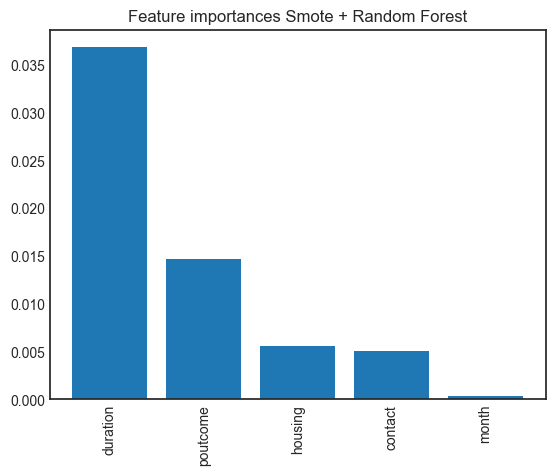

In [126]:
over = SMOTE(sampling_strategy=0.2, k_neighbors=6)
over_X_core, over_y_core = over.fit_resample(X_train_core, y_train)
under = RandomUnderSampler(sampling_strategy=0.2)
under_X_core, under_y_core = under.fit_resample(over_X_core, over_y_core)
SMOTE_SRF_core = RandomForestClassifier(n_estimators= 60,
                                     min_samples_split= 20,
                                     min_samples_leaf = 10,
                                     class_weight={1:6, 0:1},
                                     max_depth = 11)

tree_core = SMOTE_SRF_core.fit(under_X_train, under_y_train)
importances = tree_core.feature_importances_
headers = ["name", "score"]
values = sorted(zip(under_X_core.columns, tree_core.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(feature_importances))
plt.bar(x_pos, feature_importances['score'])
plt.xticks(x_pos, feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances Smote + Random Forest')
plt.show()
#Thứ tự ảnh hưởng của các biến housing và contact có thay đổi cho nhau 

### Xem xét giá trị các biến có ảnh hưởng và đề xuất

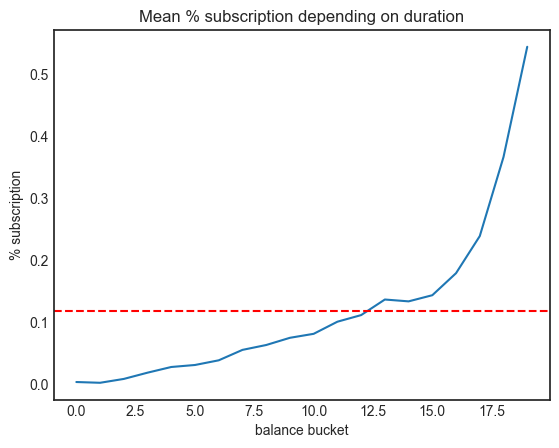

438

In [127]:
# Xem xét biến duration
df0['deposit'] = df0['deposit'].astype('category').cat.codes
df0['duration_buckets'] = pd.qcut(df0['duration'], 20, labels=False, duplicates = 'drop')
mean_deposit = df0.groupby(['duration_buckets'])['deposit'].mean()
plt.plot(mean_deposit.index, mean_deposit.values)
plt.axhline(y= df0['deposit'].mean(), color='r', linestyle='--')
plt.title('Mean % subscription depending on duration')
plt.xlabel('duration bucket')
plt.ylabel('% subscription')
plt.show()
# Đối tượng khách hàng có thời gian tiếp thị lớn hơn 438s (7 phút) thì có tỷ lệ đăng ký cao hơn hẳn, nhóm này chiếm khoảng 6% tập khách hàng
df0[df0['duration_buckets'] == 17]['duration'].min()


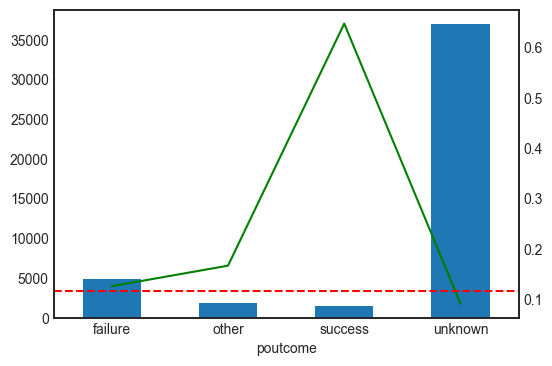

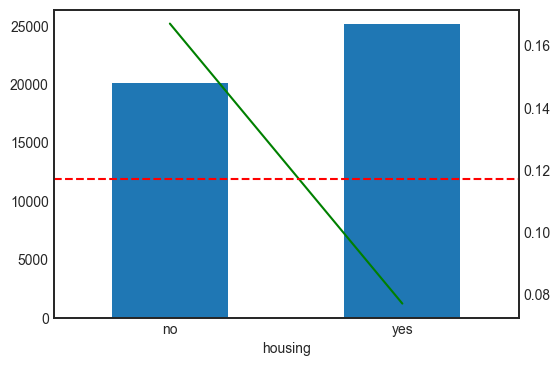

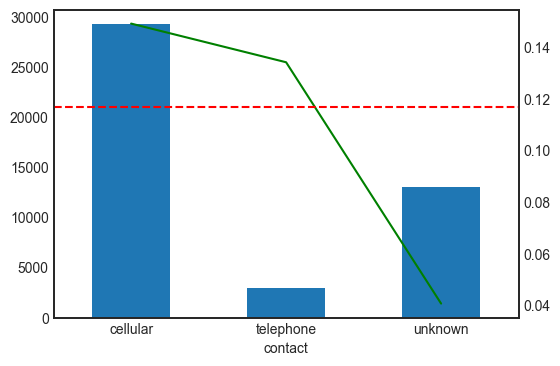

In [153]:
for col in df[['poutcome','housing','contact']]:
    fig, axs = plt.subplots(figsize=(6,4))
    mean_deposit = df0.groupby(col)['deposit'].agg(['mean','count'])
    mean_deposit['count'].plot(kind = 'bar')
    mean_deposit['mean'].plot(secondary_y= True, color = 'g')
    plt.axhline(y= df0['deposit'].mean(), color='r', linestyle='--')
# Nhóm poutcome = success có tỷ lệ đăng ký cao hơn hẳn, tuy nhiên nhóm này chiếm khá ít 
# Nhóm poutcome = unknown (aka nhóm khách hàng mới hoàn toàn) có tỷ lệ đăng ký thấp hơn hẳn các nhóm khác
# Nhóm người không có nợ mua nhà (housing = no) có tỷ lệ đăng ký cao hơn
# Nhóm contact = unknonw có tỷ lệ đăng ký rất thấp --> ngoài hình thức tiếp thị bằng telephone và cellular thì các hình thức tiếp thị khác không hiệu quả
